# Stack Exchange Data Science Board Analysis

When developing educational materials for data science topics it is important to stay on top what is in demand. Therefore, it is worthwhile to study frequency of questions and their domain on Stack Exchange Data Science (SEDS) section. A quick query of the SEDS data indicates that questions tagged as machine learning, python and deep learning are posted the most. Tags and posts tables in SEDS database seem to be the most promising for finding the most relevant content.

In the following we will perform the analysis of the posts data involving questions starting from 2019.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
posts = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
posts.head()

Id        CreationDate  Score  ViewCount  \
0  44419 2019-01-23 09:21:13      1         21   
1  44420 2019-01-23 09:34:01      0         25   
2  44423 2019-01-23 09:58:41      2       1651   
3  44427 2019-01-23 10:57:09      0         55   
4  44428 2019-01-23 11:02:15      0         19   

                                                Tags  AnswerCount  \
0                    <machine-learning><data-mining>            0   
1  <machine-learning><regression><linear-regressi...            0   
2       <python><time-series><forecast><forecasting>            0   
3              <machine-learning><scikit-learn><pca>            1   
4           <dataset><bigdata><data><speech-to-text>            0   

   FavoriteCount  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [4]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [5]:
posts.shape

(8839, 7)

In [6]:
posts["FavoriteCount"].value_counts()

1.0     953
2.0     205
0.0     175
3.0      43
4.0      12
5.0       8
6.0       4
7.0       4
11.0      1
8.0       1
16.0      1
Name: FavoriteCount, dtype: int64

We observe that only the FavoriteCount column contains missing values. Here the missing values could imply that no one labeled the post as favorite, so filling NA values with zeroes might be the safest option to deal with them. Column types are correct, except for the FavoriteCount which would be more appropriate as an integer column so we can cast it as such after dealing with missing values.

In [7]:
posts = posts.fillna(0)

In [8]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [9]:
posts["FavoriteCount"] = posts["FavoriteCount"].astype("int")

In [10]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [11]:
posts["Tags"] = (posts["Tags"].str.replace("<", "")
                              .str.replace(">",",")
                              .str.strip(","))

In [12]:
all_tags={}

for i in range(posts.shape[0]):
    for tag in posts["Tags"].iloc[i].split(","):
        if tag not in all_tags:
            all_tags[tag] = posts["ViewCount"].iloc[0]
        else:
            all_tags[tag] += posts["ViewCount"].iloc[0]

In [13]:
top_tags = {}

for w in sorted(all_tags, key=all_tags.get, reverse=True)[:10]:
    top_tags[w] = all_tags[w]

In [14]:
top_tags = pd.Series(top_tags).reset_index()
top_tags.columns = ["Tag", "ViewCount"]

In [15]:
top_tags = top_tags.sort_values(by="ViewCount", ascending=False).reset_index(drop=True)

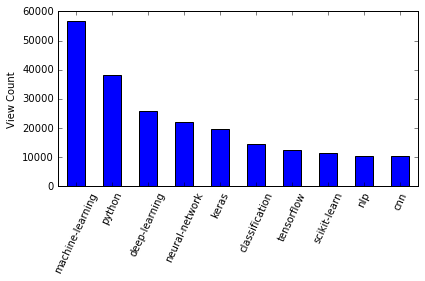

In [16]:
top_tags.plot(kind="bar", legend=None)
plt.xticks(top_tags.index, top_tags["Tag"], rotation=65)
plt.ylabel("View Count")
plt.tight_layout()

Here we can see the top 10 topics appearing on the DSSE, based on the tags found in particular questions. Some of them are highly correlated so it would be reasonable to assume they often appear together. For instance, python, scikit-learn, machine-learning should all be highly correlated. Similarly, we can except tags like deep-learning, neural-networks, keras, tensorflow etc to often appear together in most topics.

### Deep Learning
In the next section we will analyze if deep learning is just a passing trend, or if it continues to rise in popularity as time passes.

In [17]:
questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [18]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [19]:
questions["Tags"] = (questions["Tags"].str.replace("<", "")
                              .str.replace(">",",")
                              .str.strip(","))

In [20]:
questions.head(10)

Id        CreationDate  \
0  45416 2019-02-12 00:36:29   
1  45418 2019-02-12 00:50:39   
2  45422 2019-02-12 04:40:51   
3  45426 2019-02-12 04:51:49   
4  45427 2019-02-12 05:08:24   
5  45428 2019-02-12 05:43:18   
6  45430 2019-02-12 06:20:30   
7  45431 2019-02-12 07:26:56   
8  45433 2019-02-12 08:56:23   
9  45434 2019-02-12 09:09:01   

                                                Tags  
0            python,keras,tensorflow,cnn,probability  
1                                     neural-network  
2                          python,ibm-watson,chatbot  
3                                              keras  
4  r,predictive-modeling,machine-learning-model,s...  
5                                                cnn  
6                          machine-learning,learning  
7                                   machine-learning  
8                       python,keras,tensorflow,lstm  
9               neural-network,feature-selection,mlp

In [21]:
deep_learning = ["tensorflow", "keras", "neural-network", "cnn", "nlp", "deep-learning"]

In [22]:
questions["CreationDate"].max()

Timestamp('2020-01-19 03:01:03')

In [23]:
questions["CreationDate"].min()

Timestamp('2014-05-13 23:58:30')

In [24]:
start = pd.to_datetime("2015-01-01")
nsteps = 60
diff = dt.timedelta(days=30)

In [25]:
current_step = 1
dl = []


while current_step <= nsteps:
    end = start + diff
    count = 0
    mask = ((questions["CreationDate"] >= start) & 
            (questions["CreationDate"] <= end))
    temp_data = questions[mask]
    for tags in temp_data["Tags"]:
        for tag in deep_learning:
            if tag in tags:
                count += 1
                break
    dl.append((start, count, temp_data.shape[0], count / temp_data.shape[0]))
    current_step += 1
    start = end

In [26]:
dl_df = pd.DataFrame(dl, columns=["date", "dl_topics", "total_topics", "dl_pct"])

In [27]:
dl_df["dl_pct"] = (100 * dl_df["dl_pct"]).round(1)

In [36]:
dl_df.head()

date  dl_topics  total_topics  dl_pct
0 2015-01-01          5            62     8.1
1 2015-01-31          6            76     7.9
2 2015-03-02          8            52    15.4
3 2015-04-01          6            71     8.5
4 2015-05-01         17            91    18.7

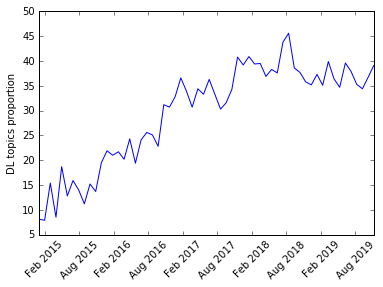

In [35]:
plt.plot(dl_df["date"], dl_df["dl_pct"])
plt.xticks(rotation=45)
plt.ylabel("DL topics proportion")

We performed an analysis of tags appearing in questions since the start of 2015. We assumed that question was about deep learning if it included at least one of the following tags: tensorflow, keras, neural-network, cnn, nlp, deep-learning. We can see that interest for deep learning has grown steadily from 2015. Initially only around 10-15% of topics on DSSE were about deep learning, while in recent times, this proportion amounts to around 40% and is stable. This indicates that deep learning is not just a passing fad, and is here to stay.